In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# Set the paths to your dataset folders
train_data_dir = '/content/drive/MyDrive/archive/tomato/train'
validation_data_dir = '/content/drive/MyDrive/archive/tomato/val'

In [ ]:
# Parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 10

In [ ]:
# Data Preprocessing and Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)
# Build the AlexNet model
model = Sequential()
model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [ ]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 384)       1

In [ ]:
# Set up callbacks for training
checkpoint = ModelCheckpoint('leaf_disease_detection.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1)

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size,
                    callbacks=[checkpoint, early_stopping])

# Save the model
model.save('final_leaf_disease_model.h5')

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator, verbose=0)
print(f"Validation loss: {loss:.4f}, Validation accuracy: {accuracy:.4f}")

Epoch 1/10
312/312 [==============================] - ETA: 0s - loss: 1.8866 - accuracy: 0.2842
Epoch 1: val_accuracy improved from -inf to 0.50302, saving model to leaf_disease_detection.h5
312/312 [==============================] - 2348s 7s/step - loss: 1.8866 - accuracy: 0.2842 - val_loss: 1.3690 - val_accuracy: 0.5030
Epoch 2/10
312/312 [==============================] - ETA: 0s - loss: 0.9765 - accuracy: 0.6529
Epoch 2: val_accuracy improved from 0.50302 to 0.59476, saving model to leaf_disease_detection.h5
312/312 [==============================] - 170s 546ms/step - loss: 0.9765 - accuracy: 0.6529 - val_loss: 1.2185 - val_accuracy: 0.5948
Epoch 3/10
312/312 [==============================] - ETA: 0s - loss: 0.6566 - accuracy: 0.7618
Epoch 3: val_accuracy improved from 0.59476 to 0.70565, saving model to leaf_disease_detection.h5
312/312 [==============================] - 171s 549ms/step - loss: 0.6566 - accuracy: 0.7618 - val_loss: 0.8605 - val_accuracy: 0.7056
Epoch 4/10
312/312

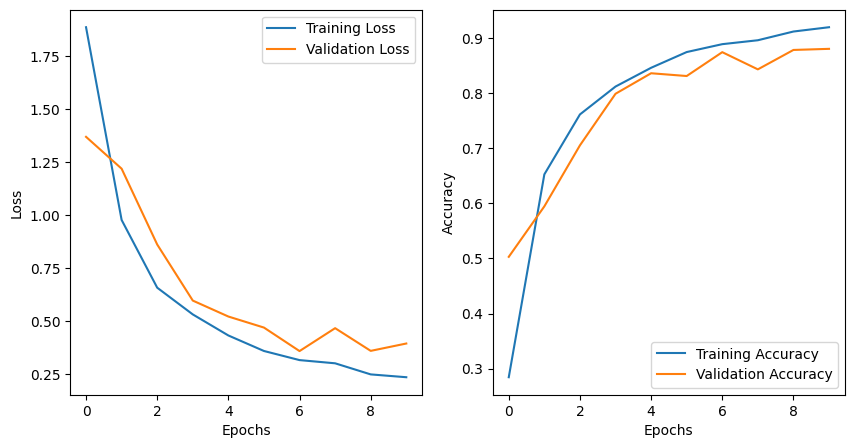

In [ ]:
# Plot the training loss and accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

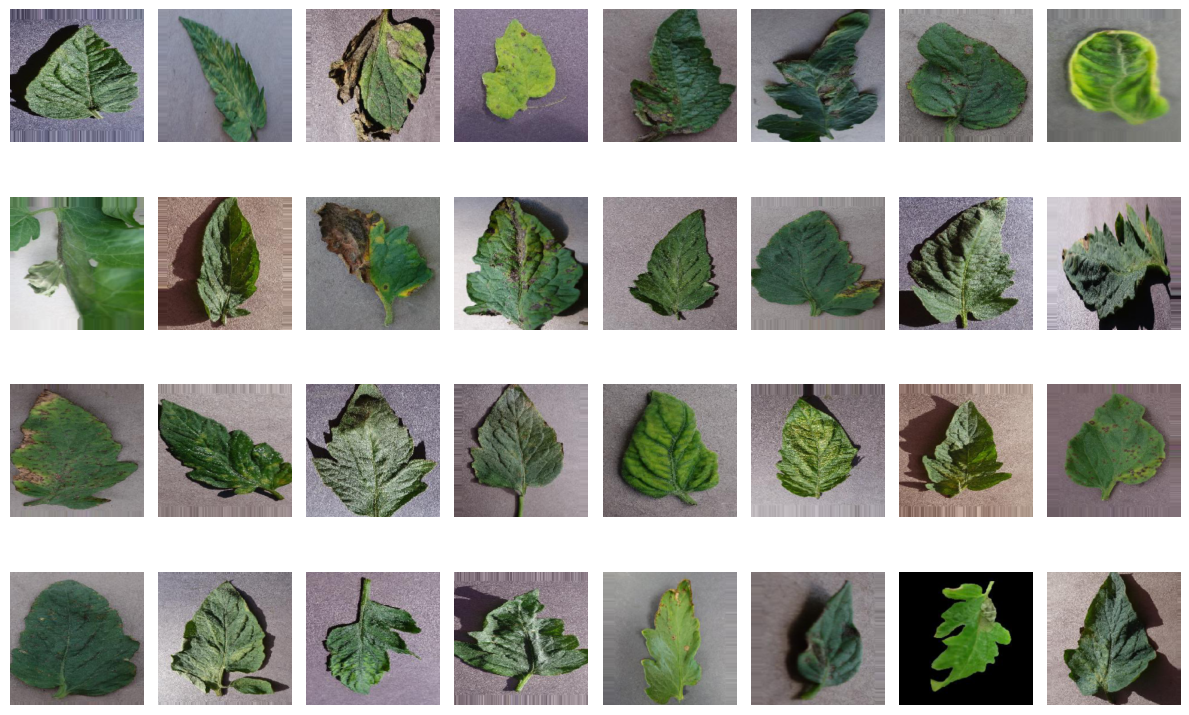

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
images, labels = train_generator.next()
fig, axes = plt.subplots(4, 8, figsize=(12, 8))
axes = axes.ravel()

for i in np.arange(0, 32):

    axes[i].imshow(images[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

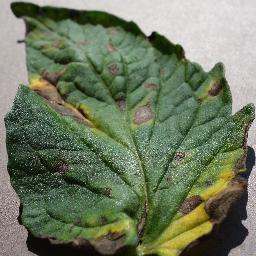

In [ ]:
from PIL import Image
def display_image(image_path):
    try:
        img = Image.open(image_path)
        img.show()
    except FileNotFoundError:
        print("image not found")

if __name__ == "__main__":
    image_location = '/content/drive/MyDrive/tomato image 1.JPG'
    display_image(image_location)

In [ ]:
# Function to preprocess the input image and get the model's prediction
image_path='/content/drive/MyDrive/tomato image 1.JPG'
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(img_width, img_height))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

def predict_leaf_disease(image_path):
    processed_image = preprocess_image(image_path)
    prediction = model.predict(processed_image)
    class_index = np.argmax(prediction)
    class_labels = train_generator.class_indices
    for label, index in class_labels.items():
        if index == class_index:
            return label, prediction[0][class_index]

In [ ]:
specific_image_path = '/content/drive/MyDrive/tomato image 1.JPG'
class_label, confidence = predict_leaf_disease(specific_image_path)
print(f"Class Label: {class_label}, Confidence: {confidence:.4f}")

1/1 [==============================] - 0s 416ms/step
Class Label: Tomato___Early_blight, Confidence: 0.7432


In [ ]:
specific_image_path = '/content/drive/MyDrive/tomato image 2.JPG'
class_label, confidence = predict_leaf_disease(specific_image_path)
print(f"Class Label: {class_label}, Confidence: {confidence:.4f}")

1/1 [==============================] - 0s 21ms/step
Class Label: Tomato___Target_Spot, Confidence: 0.9786
